In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection And Analysis

PIMA Diabetes Dataset

In [ ]:
diabetes_dataset=pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


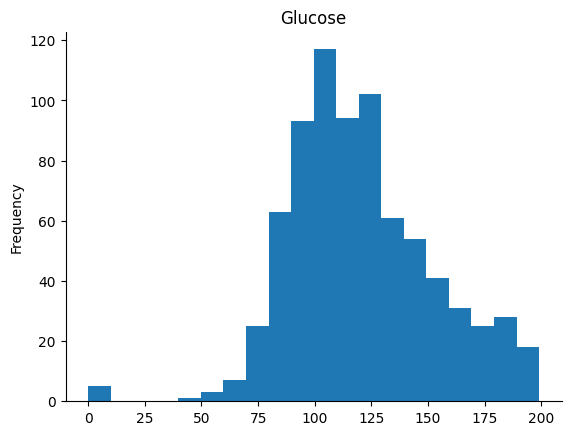

In [ ]:
# @title Glucose

from matplotlib import pyplot as plt
diabetes_dataset['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

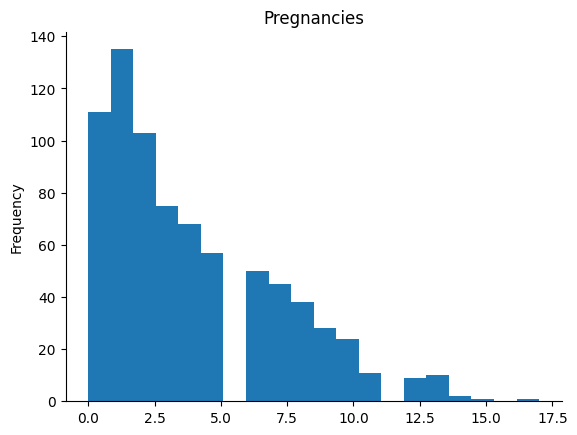

In [ ]:
# @title Pregnancies

from matplotlib import pyplot as plt
diabetes_dataset['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
diabetes_dataset.shape

(768, 9)

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268




*   0 -> Non Diabetic
*   1 -> Diabetic



In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data=scaler.transform(X) ## scaler.fit_transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y=diabetes_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
predicted_data=classifier.predict(X_train)
predicted_accuracy=accuracy_score(predicted_data,Y_train)
print("acuuracy on training set: ",predicted_accuracy)

acuuracy on training set:  0.7866449511400652


In [ ]:
predicted_test_data=classifier.predict(X_test)
predicted_test_accuracy=accuracy_score(predicted_test_data,Y_test)
print("acuuracy on testing set: ",predicted_test_accuracy)

acuuracy on training set:  0.7727272727272727


Making a Predictive System

In [ ]:
input_data=(1,85,66,29,0,26.6,0.351,31)

input_data_as_numpy_array=np.asarray(input_data)

#reshape
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# Convert the reshaped numpy array to a pandas DataFrame with original column names
input_data_df = pd.DataFrame(input_data_reshaped, columns=diabetes_dataset.drop(columns='Outcome',axis=1).columns)

std_data=scaler.transform(input_data_df)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if(prediction[0]==0):
  print("The Person is Non diabetic")
else:
  print("The person is Diabetic")

[[-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]]
[0]
The Person is Non diabetic
